Railway connections in Ukraine


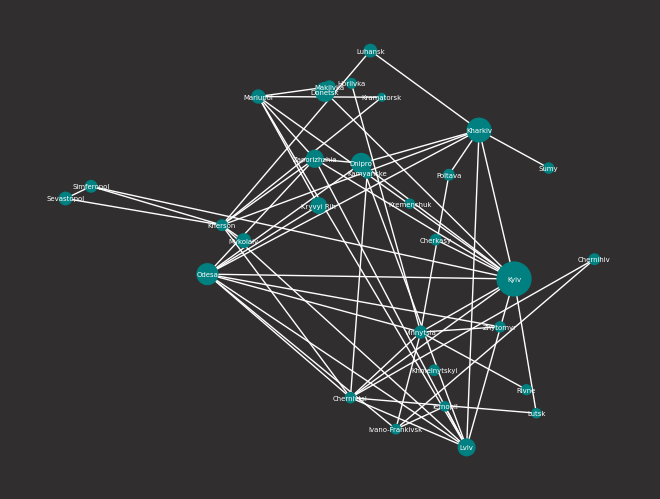

Connection between Poltava a Odesa
['Poltava', 'Kharkiv', 'Odesa']
Duration: 21 h


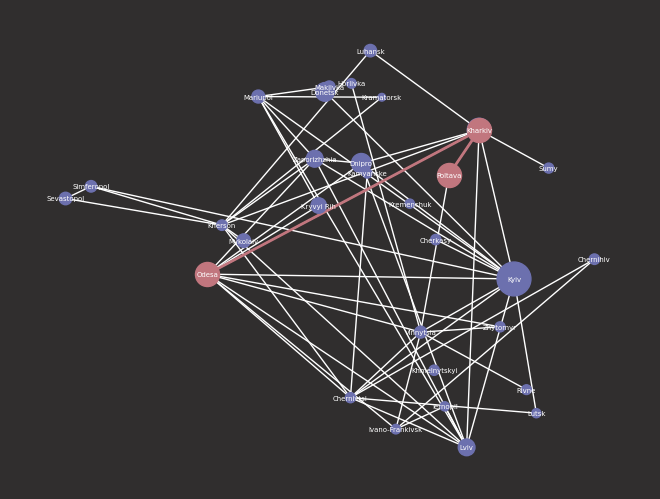

In [31]:
# importing required modules

import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import json

# indicating the coordinates and cities
with open('uacities_sizes.json') as f:
    uacities_sizes = json.load(f)
    
with open('duration_uacities.json', 'r') as f2:
    duration_uacities = json.load(f2)["duration_uacities"]
    
# creating a graph
G = nx.Graph()

# text to graph 1
print('Railway connections in Ukraine')

# building a graph 1
G.add_nodes_from(uacities_sizes['positions'])
G.add_weighted_edges_from(duration_uacities)
plt.orientation = u'vertical'
fig = plt.figure()
SCALE_FACTOR = 5
nx.draw(G,uacities_sizes['positions'], with_labels= True, 
        font_color='#ffffff', 
        font_size= 5,
        node_size = [uacities_sizes['size'][city]/SCALE_FACTOR for city in G.nodes if city in uacities_sizes['size']], 
        node_color = '#008080',
        edge_color = '#ffffff'
       )
fig.set_facecolor('#302e2e')
plt.show()

# text to graph 2
source_city = 'Poltava'
target_city = 'Odesa'
path = nx.shortest_path(G,source = source_city,target = target_city)
time = 0
for s,t in list(zip(path,path[1:])):
     time+=G[s][t]['weight']

print('Connection between {0} a {1}'.format(source_city,target_city))
print(path)
print(f'Duration: {time} h')

# building a graph 2
path_edges = list(zip(path,path[1:]))
fig = plt.figure()
SCALE_FACTOR = 5
nx.draw(G,uacities_sizes['positions'],with_labels = True, 
        font_color = '#ffffff', 
        font_size = 5, 
        node_size = [uacities_sizes['size'][city]/SCALE_FACTOR for city in G.nodes if city in uacities_sizes['size']], 
        node_color = '#6c70ae',
        edge_color = '#ffffff'
       )
nx.draw_networkx_nodes(G,uacities_sizes['positions'],nodelist = path,node_color = '#c1767e')
nx.draw_networkx_edges(G,uacities_sizes['positions'],edgelist = path_edges,edge_color= '#c1767e',width = 2)
fig.set_facecolor('#302e2e')

df = nx.to_pandas_edgelist(G)
df.to_csv('data.csv')